# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- ~~Load the data as a `pandas` data frame.~~
- ~~Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).~~
- ~~Validate that you have no missing values.~~
- ~~Add informative names to the features.~~
- ~~The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)~~

~~At the end, print the first five rows of the dataset to demonstrate the above.~~

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# TODO

df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", header = None, names = ['age', 'year', 'positive_nodes_detected', 'survived_five_years'])
df['survived_five_years'] = df['survived_five_years'].apply(lambda x : 0 if x==2 else 1 )

In [51]:
print(df.shape == (306,4))
print(df.isna().sum())

True
age                        0
year                       0
positive_nodes_detected    0
survived_five_years        0
dtype: int64


In [52]:
df.head(5)

,age,year,positive_nodes_detected,survived_five_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


,age,year,positive_nodes_detected,survived_five_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


## Part 2 - Examine the distribution and relationships of the features

Explore the data - ~~create at least *2* tables (can be summary statistics or crosstabulations)~~ and ~~*2* plots illustrating the nature of the data.~~

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [204]:
df['age_bin']=pd.cut(df['age'], 5, precision =  0)
df['node_bin'] = pd.cut(df['positive_nodes_detected'], 10, precision =-1)


In [205]:
df.head()

,age,year,positive_nodes_detected,survived_five_years,age_bin,node_bin,"node_1,2,3,4,5,6+",node_counts,year_bin
0,30,64,1,1,"(30.0, 41.0]","(-0.1, 5.0]",1,1,"(62.0, 65.0]"
1,30,62,3,1,"(30.0, 41.0]","(-0.1, 5.0]",3,2,"(60.0, 62.0]"
2,30,65,0,1,"(30.0, 41.0]","(-0.1, 5.0]",0,0,"(65.0, 67.0]"
3,31,59,2,1,"(30.0, 41.0]","(-0.1, 5.0]",2,2,"(58.0, 60.0]"
4,31,65,4,1,"(30.0, 41.0]","(-0.1, 5.0]",4,2,"(65.0, 67.0]"


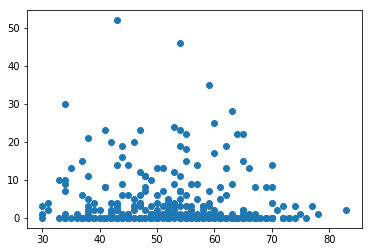

In [200]:
# TODO
plt.scatter(df['age'],df['positive_nodes_detected'])

In [212]:
z =df.groupby(['year']).agg({'survived_five_years': np.mean})
z.unstack(level=1)

                     year
survived_five_years  58      0.666667
                     59      0.666667
                     60      0.857143
                     61      0.884615
                     62      0.695652
                     63      0.733333
                     64      0.741935
                     65      0.535714
                     66      0.785714
                     67      0.840000
                     68      0.769231
                     69      0.636364
dtype: float64

                                  survived_five_years
age_bin      survived_five_years                     
(30.0, 41.0] 0                                      4
             1                                     39
(41.0, 51.0] 0                                     31
             1                                     68
(51.0, 62.0] 0                                     27
             1                                     69
(62.0, 72.0] 0                                     16
             1                                     43
(72.0, 83.0] 0                                      3
             1                                      6


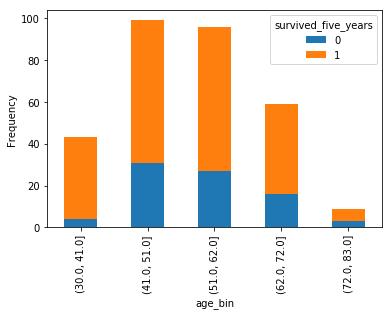

In [130]:
a = df.groupby(['age_bin','survived_five_years']).agg({'survived_five_years': np.size})
print(a)
a['survived_five_years'].unstack(level=1).plot(kind='bar', stacked=True)
plt.ylabel("Frequency")
plt.show()

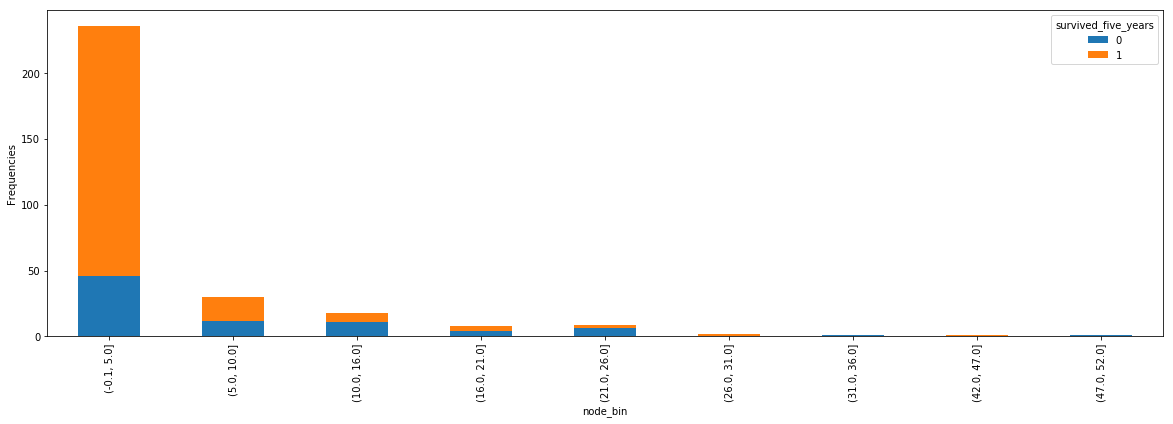

In [128]:
b=df.groupby(['node_bin','survived_five_years']).agg({'survived_five_years': np.size})

b['survived_five_years'].unstack(level=1).plot(kind='bar', stacked=True, figsize=(20,6))
plt.ylabel("Frequencies")
plt.show()

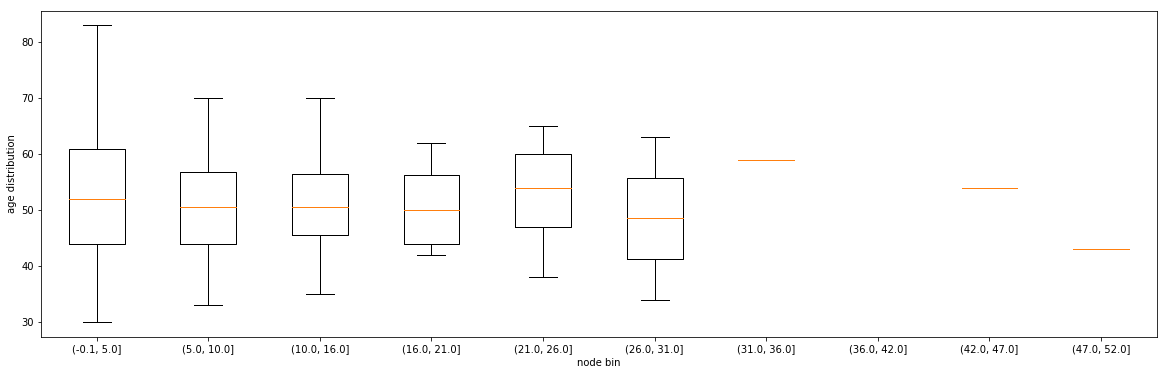

In [132]:
c = df['age'].groupby(df['node_bin'])
data = [group for  name, group in c]
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.set_axisbelow(True)

bp = plt.boxplot(data, sym='+')

plt.setp(ax1,xticklabels=[name for name, group in c])
plt.ylabel("age distribution")
plt.xlabel("node bin")
plt.show()

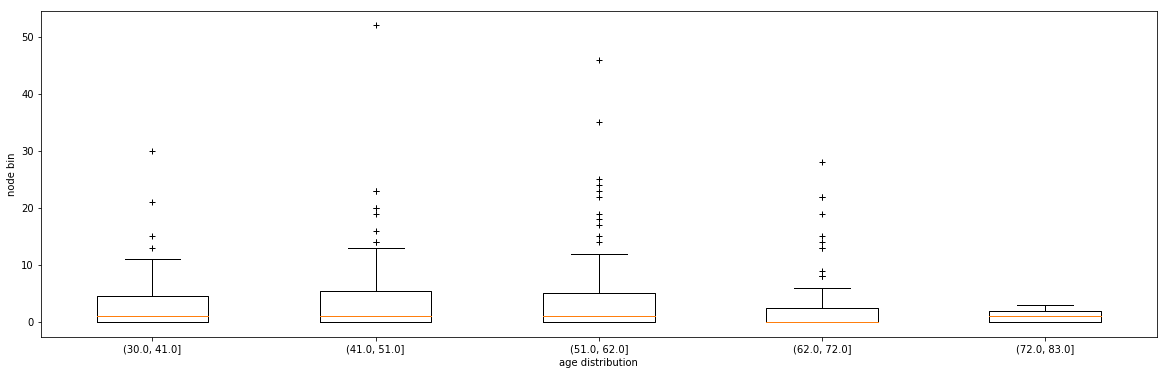

In [171]:
c = df['positive_nodes_detected'].groupby(df['age_bin'])
data = [group for  name, group in c]
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.set_axisbelow(True)

bp = plt.boxplot(data, sym='+')

plt.setp(ax1,xticklabels=[name for name, group in c])
plt.xlabel("age distribution")
plt.ylabel("node bin")
plt.show()

In [133]:
survived_percent1 = df.groupby(['node_bin']).agg({'survived_five_years': np.mean})
survived_percent1.unstack(level=1)

                     node_bin    
survived_five_years  (-0.1, 5.0]     0.805085
                     (5.0, 10.0]     0.600000
                     (10.0, 16.0]    0.388889
                     (16.0, 21.0]    0.500000
                     (21.0, 26.0]    0.333333
                     (26.0, 31.0]    1.000000
                     (31.0, 36.0]    0.000000
                     (36.0, 42.0]         NaN
                     (42.0, 47.0]    1.000000
                     (47.0, 52.0]    0.000000
dtype: float64

In [134]:
survived_percent2 = df.groupby(['age_bin']).agg({'survived_five_years': np.mean})
survived_percent2.unstack(level=1)

                     age_bin     
survived_five_years  (30.0, 41.0]    0.906977
                     (41.0, 51.0]    0.686869
                     (51.0, 62.0]    0.718750
                     (62.0, 72.0]    0.728814
                     (72.0, 83.0]    0.666667
dtype: float64

In [195]:
df10 =df
df10['node_counts'] = df['positive_nodes_detected'].apply(lambda x : x if x <10 else 10)
survived_percent3 = df10.groupby(['node_counts']).agg({'survived_five_years': np.mean})
survived_percent3.unstack(level=1),df10.groupby(['node_counts']).agg({'survived_five_years': np.size})

(                     node_counts
 survived_five_years  0              0.860294
                      1              0.804878
                      2              0.750000
                      3              0.650000
                      4              0.769231
                      5              0.333333
                      6              0.571429
                      7              0.714286
                      8              0.714286
                      9              0.333333
                      10             0.441860
 dtype: float64,              survived_five_years
 node_counts                     
 0                            136
 1                             41
 2                             20
 3                             20
 4                             13
 5                              6
 6                              7
 7                              7
 8                              7
 9                              6
 10                            43)

In [168]:
df5 =df
df5['node_counts'] = df['positive_nodes_detected'].apply(lambda x : x if x <5 else 5)
survived_percent3 = df.groupby(['node_counts']).agg({'survived_five_years': np.mean})
survived_percent3.unstack(level=1),df10.groupby(['node_counts']).agg({'survived_five_years': np.size})

(                     node_counts
 survived_five_years  0              0.860294
                      1              0.804878
                      2              0.750000
                      3              0.650000
                      4              0.769231
                      5              0.486842
 dtype: float64,              survived_five_years
 node_counts                     
 0                            136
 1                             41
 2                             20
 3                             20
 4                             13
 5                             76)

(                          node_counts
 age_bin      node_counts             
 (30.0, 41.0] 0                     19
              1                      5
              2                     19
 (41.0, 51.0] 0                     40
              1                     15
              2                     44
 (51.0, 62.0] 0                     36
              1                     15
              2                     45
 (62.0, 72.0] 0                     37
              1                      4
              2                     18
 (72.0, 83.0] 0                      4
              1                      2
              2                      3,
 <matplotlib.axes._subplots.AxesSubplot at 0x29ea3d2f208>)

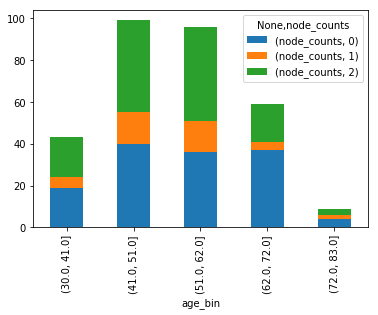

In [197]:
df1 =df
df1['node_counts'] = df['positive_nodes_detected'].apply(lambda x : x if x <2 else 2)
df6=df1.groupby(['age_bin','node_counts']).agg({'node_counts':np.size})
df6, df6.unstack(level=1).plot(kind='bar', stacked=True)


In [199]:
survived_percent4 = df.groupby(['age_bin']).agg({'positive_nodes_detected': np.mean})
survived_percent4.unstack(level=1)

                         age_bin     
positive_nodes_detected  (30.0, 41.0]    3.813953
                         (41.0, 51.0]    4.181818
                         (51.0, 62.0]    4.604167
                         (62.0, 72.0]    3.423729
                         (72.0, 83.0]    1.111111
dtype: float64

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# Answers

1. I could not find a positive correlation with any of the data. year did not seem to have any correlation with survival.

2. Node count seems to have a negative correlation with survivial, if only at the extremes. From what i can tell, the rate of survival is about 80%+ if you have 1 node or fewer, and less than less than 50% if you have 5 nodes or more. One factor that looks to have a negative with survival is low age. Grouping the information by ages, suvival rate drops as age increases.

3. The only relationship I can see between age and node count is that as one gets older, one is more likely have a greater number of nodes, up to a certain point. then the number of nodes decreases. Maybe because the age is a negative factor in survival, a younger person can endure more nodes developing.